In [ ]:
from google.colab import files
from PIL import Image

# Upload the image file
uploaded = files.upload()

# Get the filename
filename = next(iter(uploaded))

# Open the image
image = Image.open(filename)

# Display the image
image.show()


Saving Nature-.jpg to Nature-.jpg


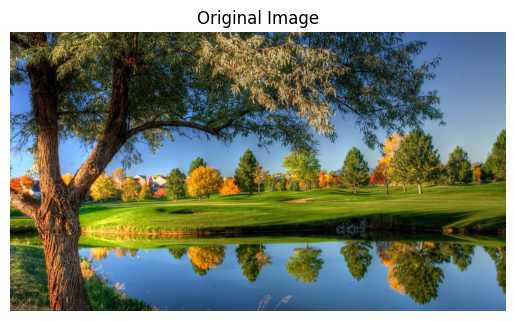

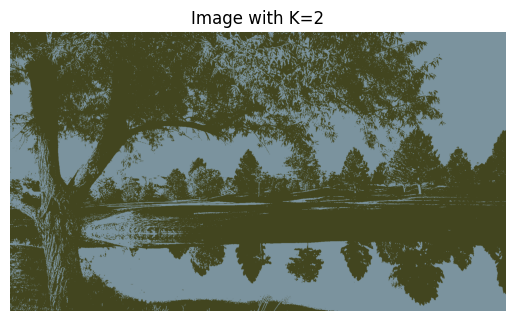

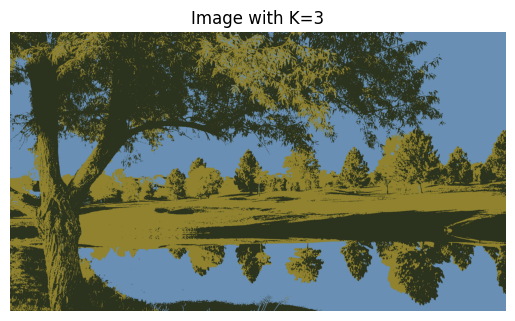

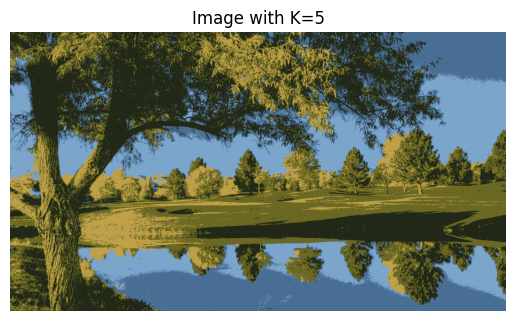

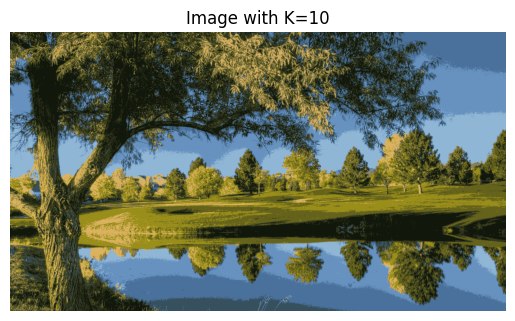

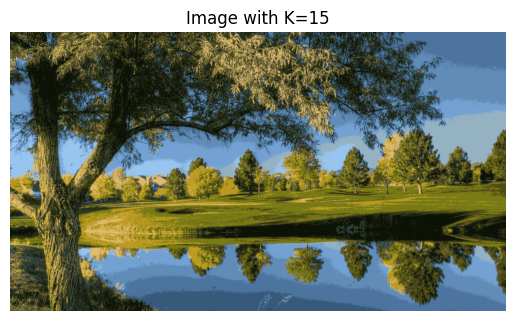

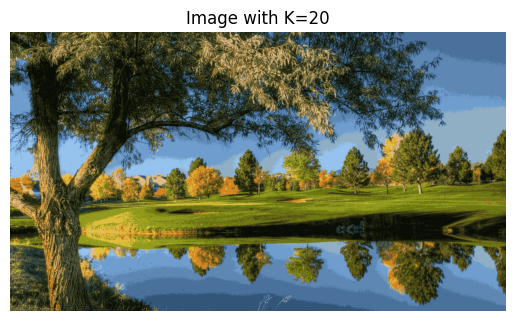

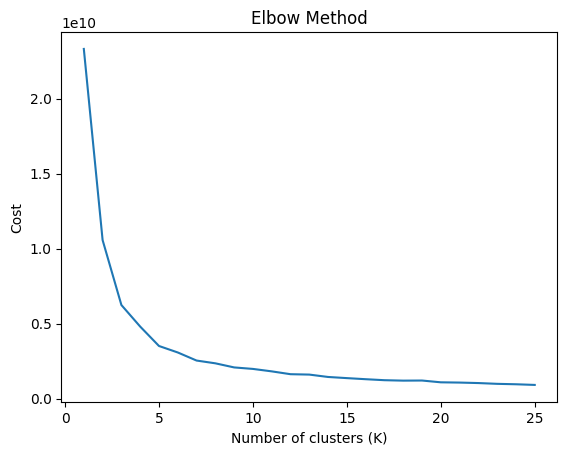

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

class KMeans:
    def __init__(self, n_clusters, max_iter=20):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            labels = pairwise_distances_argmin(X, self.centroids)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        return self.centroids, labels

def reduce_colors(image, n_colors):
    pixels = np.reshape(image, (-1, 3))
    kmeans = KMeans(n_colors)
    centroids, labels = kmeans.fit(pixels)
    new_colors = centroids[labels].astype(int)
    new_image = np.reshape(new_colors, image.shape)
    return new_image

def plot_elbow(X, max_k=25):
    costs = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(k)
        centroids, labels = kmeans.fit(X)
        cost = np.sum((X - centroids[labels]) ** 2)
        costs.append(cost)
    plt.plot(range(1, max_k + 1), costs)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Cost')
    plt.title('Elbow Method')
    plt.show()

# Example usage
image = plt.imread('Nature-.jpg')  # Load your image here
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

k_values = [2, 3, 5, 10, 15, 20]
for k in k_values:
    reduced_image = reduce_colors(image, k)
    plt.imshow(reduced_image)
    plt.axis('off')
    plt.title(f'Image with K={k}')
    plt.show()

# Applying the elbow method to find optimal K
pixels = np.reshape(image, (-1, 3))
plot_elbow(pixels)
